In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('loan-train.csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df_test= pd.read_csv('loan-test.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
#joining train and test data for further kfold cross validation using concat()
df=pd.concat([df_train, df_test], axis='rows')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


A heatmap to show correlation between coefficients(attributes) of data

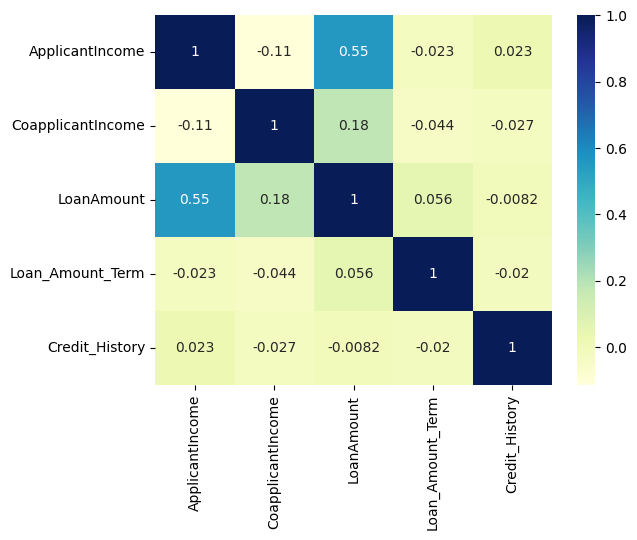

In [5]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

Pairplot to show all the relationship charts in the data

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [8]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

Using label encoding for data preprocessing of categorical variables

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
le=LabelEncoder()#label encoding categorical variables

In [11]:
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: Gender, Length: 981, dtype: int64>

In [12]:
df['Married']=le.fit_transform(df['Married'])
df['Married'].unique

<bound method Series.unique of 0      0
1      1
2      1
3      1
4      0
      ..
362    1
363    1
364    0
365    1
366    0
Name: Married, Length: 981, dtype: int64>

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
df['Dependents']=le.fit_transform(df['Dependents'])
df['Dependents'].unique

<bound method Series.unique of 0      0
1      1
2      0
3      0
4      0
      ..
362    3
363    0
364    0
365    0
366    0
Name: Dependents, Length: 981, dtype: int64>

In [15]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Self_Employed'].unique

<bound method Series.unique of 0      0
1      0
2      1
3      0
4      0
      ..
362    1
363    0
364    0
365    0
366    1
Name: Self_Employed, Length: 981, dtype: int64>

In [17]:
df['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [18]:
m=df['Loan_Status'].mode()[0]
df['Loan_Status']= df['Loan_Status'].fillna(m)

In [19]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: Loan_Status, Length: 981, dtype: int64>

In [20]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [21]:
df['Education']=le.fit_transform(df['Education'])
df['Education'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      1
4      0
      ..
362    1
363    0
364    0
365    0
366    0
Name: Education, Length: 981, dtype: int64>

In [22]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Property_Area'].unique

<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
362    2
363    2
364    1
365    0
366    0
Name: Property_Area, Length: 981, dtype: int64>

Using median for filling nan values of continous variable in data preprocessing

In [24]:
med=df['LoanAmount'].median()
df['LoanAmount']=df['LoanAmount'].fillna(med)

In [25]:
med=df['Loan_Amount_Term'].median()
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(med)

In [26]:
med=df['Credit_History'].median()
df['Credit_History']=df['Credit_History'].fillna(med)

In [27]:
df=df.drop(['Loan_ID'], axis='columns')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2,1
363,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2,1
364,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1,1
365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0,1


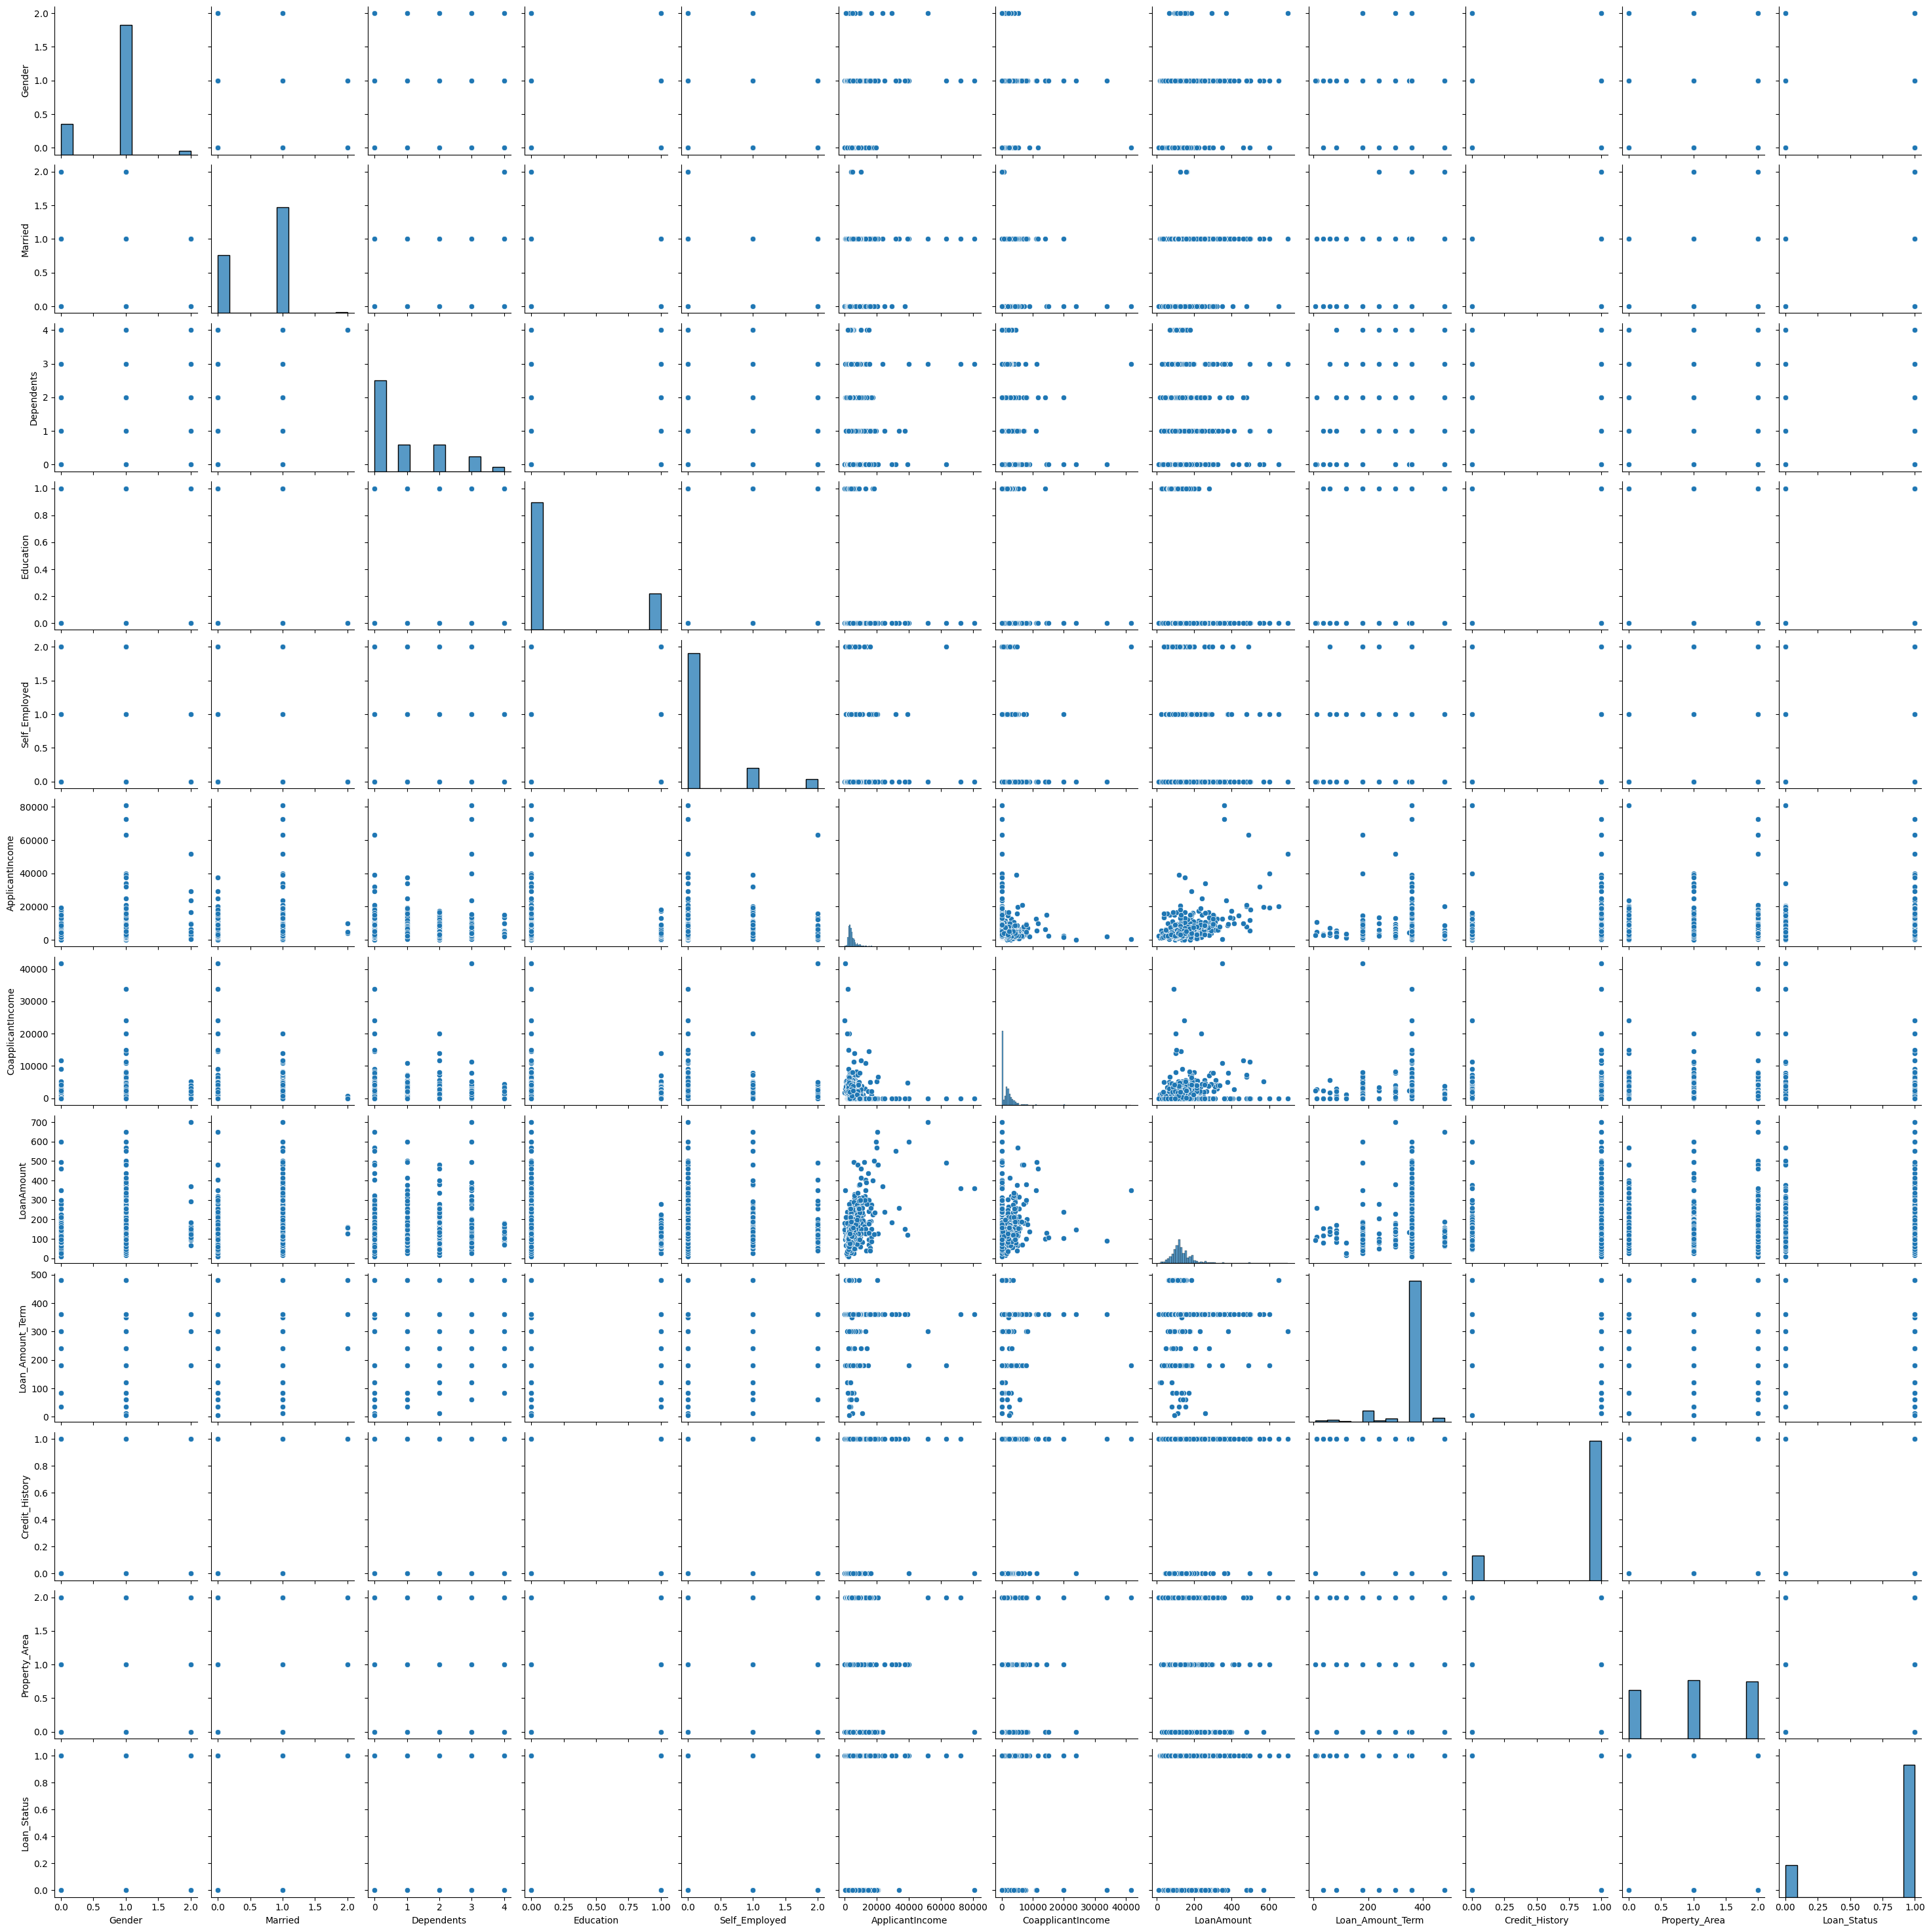

In [28]:
sns.pairplot(df)

Train Test Split for dataset


In [29]:
from sklearn.model_selection import train_test_split
x=df.drop(['Loan_Status'], axis='columns')
y=df['Loan_Status']
xt, xtt, yt, ytt = train_test_split(x, y, test_size=0.2)

Using Support Vector Machine to develop a prediction model

In [30]:
model = SVC(kernel = 'linear', C = 4, gamma = 'scale')
model.fit(xt, yt)

SVC(C=4, kernel='linear')

Using KFold Cross Validation method to examine the accuracy of the ML model

In [31]:
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5)
from sklearn.model_selection import cross_val_score
cross_val_score(model, xtt, ytt)

array([0.825     , 0.775     , 0.8974359 , 0.79487179, 0.71794872])